In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [2]:
import re
import numpy as np

In [3]:
# df_trnsc = pd.read_csv("./sample_data/transactions-2020-07-01-2020-09-02 (1).csv")
df_trnsc = pd.read_csv("./sample_data/transactions-2020-05-11-2021-05-12.csv")
# 
df_trnsc.head(2)

/home/kefei2/anaconda3/envs/api/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (40) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Date,Time,Time Zone,Gross Sales,Discounts,Net Sales,Gift Card Sales,Tax,Tip,Partial Refunds,Total Collected,Source,Card,Card Entry Methods,Cash,Square Gift Card,Other Tender,Other Tender Type,Other Tender Note,Fees,Net Total,Transaction ID,Payment ID,Card Brand,PAN Suffix,Device Name,Staff Name,Staff ID,Details,Description,Event Type,Location,Dining Option,Customer ID,Customer Name,Customer Reference ID,Device Nickname,Deposit ID,Deposit Date,Deposit Details,Fee Percentage Rate,Fee Fixed Rate,Refund Reason,Discount Name,Transaction Status,Order Reference ID
0,05/11/21,16:36:42,Mountain Time (US & Canada),$5.45,$0.00,$5.45,$0.00,$0.41,$1.00,$0.00,$6.86,Point of Sale,$6.86,Dipped,$0.00,$0.00,$0.00,NaN,NaN,$-0.28,$6.58,nMOoMwZUNBD38dDpoWShe49eV,d64bXzvejDYRxOJDCfyGMXUJuaB,Visa,0244,Ernest,NaN,NaN,https://squareup.com/dashboard/sales/transactions/nMOoMwZUNBD38dDpoWShe49eV/by-unit/7GW3QTHDACDY4,Latte (12oz HOT) - double espresso with milk // 16oz HOT lattes come with four shots by default \n,Payment,SONDER Coffee,NaN,A1RXPQDVKS6HH755X1J8V73C5M,Alondra Ibarra,NaN,NaN,NaN,NaN,NaN,2.6,$0.10,NaN,NaN,Complete,NaN
1,05/11/21,16:27:34,Mountain Time (US & Canada),$5.30,$0.00,$5.30,$0.00,$0.40,$0.00,$0.00,$5.70,Point of Sale,$0.00,NaN,$5.70,$0.00,$0.00,NaN,NaN,$0.00,$5.70,zO4ADRWqhbSBREyfYhMhJw4eV,LZodnqG5nV7PXjueyqU5KD97uaB,NaN,NaN,Ernest,NaN,NaN,https://squareup.com/dashboard/sales/transactions/zO4ADRWqhbSBREyfYhMhJw4eV/by-unit/7GW3QTHDACDY4,"ROSE Latte (12oz HOT) - fragrant, floral, sweet & fun-- the ROSE latte.",Payment,SONDER Coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete,NaN


In [4]:
df_analysis = df_trnsc[["Date", "Time", "Time Zone", "Gross Sales", "Source", "Card Entry Methods", "Description", "Location",
                        "Customer ID", "Customer Name"]]

In [5]:
# dropna (to-do)
df_dropna = df_analysis[df_analysis.Description.notna()]
df_dropna.head()

,Date,Time,Time Zone,Gross Sales,Source,Card Entry Methods,Description,Location,Customer ID,Customer Name
0,05/11/21,16:36:42,Mountain Time (US & Canada),$5.45,Point of Sale,Dipped,Latte (12oz HOT) - double espresso with milk // 16oz HOT lattes come with four shots by default \n,SONDER Coffee,A1RXPQDVKS6HH755X1J8V73C5M,Alondra Ibarra
1,05/11/21,16:27:34,Mountain Time (US & Canada),$5.30,Point of Sale,NaN,"ROSE Latte (12oz HOT) - fragrant, floral, sweet & fun-- the ROSE latte.",SONDER Coffee,NaN,NaN
2,05/11/21,16:26:19,Mountain Time (US & Canada),$3.80,Point of Sale,Dipped,Latte (8oz HOT) - double espresso with milk // 16oz HOT lattes come with four shots by default \n,SONDER Coffee,CHCB4429S94AZFN47FHPXN969W,Shane Bischoff
3,05/11/21,16:15:10,Mountain Time (US & Canada),$5.20,Point of Sale,Tapped,"Chai Latte (16oz ICED) - chai lattes using sanctuary chai tea concentrate. no sugar, sweetened with honey. choose between the traditional, spicy, or decaf herbal chai.",SONDER Coffee,T1G6KED8EH2BH83B7CGJWCZEHW,(720) 415-4553
4,05/11/21,16:13:45,Mountain Time (US & Canada),$17.30,Point of Sale,Dipped,"Ritual Mexico (Regular), ORANGE Latte (12oz HOT) - sweet, fragrant, dreamsicle-like orange blossom latte.",SONDER Coffee,J7Z6VRCNVD1PV3FRT82JHWQQFR,Cierra Mackanos


In [6]:
# ISSUE
# e.g., consider index 4991 and 6504
index_test = [4991, 6504]
df_dropna.loc[index_test,:][['Description']]
# 1. the seperator "," is mixed with product description
# 2. multiple same products are represented by ""[0-9] x" expression 
# note: 4991 includes exactely the same items (Toasted Coconut Latte) but it doesn't use 2 x symbol
# though this inconsistency would not affact the result (not using 2 x symbol is not a problem)

,Description
4991,"PISTACHIO Cold Brew (12OZ) - honey pistachio creamy cold brew\n\nserved with a splash of cream; please comment a substitute if you wish (almond, oat, coconut)"
6504,"Butter / Plain Croissant (Regular Price), 2 x Cappuccino (Regular Cappuccino) - double shot with four ounces of milk, slight foam and lower temperature and steamed for sweetness."


In [7]:
# Let's try a different approach
# 0. notice the "," or "\\n," is still the seperator
# 1. pick out description without "," (single item)
# 2. split by ",", then try to find out patern about the splits
# e.g., the useful item name should be long enough to provide info

df_dropna[(df_dropna.Description.str.contains(",")==False)].Description.value_counts()

Latte (16oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default \n               1733
Latte (12oz HOT) - double espresso with milk // 16oz HOT lattes come with four shots by default \n                1454
Latte (16oz HOT (quad shot)) - double espresso with milk // 16oz HOT lattes come with four shots by default \n    1244
Nitro Coldbrew (16oz) - on tap nitro cold brew: creamy and chocolatey ethiopia.                                    705
Latte (8oz HOT) - double espresso with milk // 16oz HOT lattes come with four shots by default \n                  554
                                                                                                                  ... 
4 x Cortado (Regular) - double espresso with two ounces of steamed milk                                              1
5 x Guatemala | Quisache (Regular)                                                                                   1
2 x Hand Brew (Gesha Reserve) - pourover coffee 

In [8]:
# 1. pick out description without "," (single item)
item_list = df_dropna[(df_dropna.Description.str.contains(",")==False)].value_counts().reset_index()

# handle the "2 x"
# item_list[item_list.Description.str.contains(r'([0-9]*)[0-9] x ') ==True]


def seperat_num_x(multi, return_single=False):
# e.g., seperate 2 x item to [item,item]
    if (re.match(r"([0-9]*)[0-9] x ", multi)):
        num_x_item = [e.strip() for e in multi.split(" x ")]
        if return_single:
            return num_x_item[1]
        else: return [num_x_item[1]] * int(num_x_item[0])
    else: return multi
    
item_list[item_list.Description.str.contains(r'([0-9]*)[0-9] x ') ==True]\
.Description.apply(lambda x: seperat_num_x(x,True))\
.to_frame().head()

item_list_nocommma = item_list.Description.apply(lambda x: seperat_num_x(x,True))\
.value_counts()\
.reset_index()['index'].values
item_list_nocommma = np.array([e.strip().replace("\n", "").replace("*", "$") for e in item_list_nocommma])
print(item_list_nocommma.size)
pd.DataFrame(item_list_nocommma).head()

306


/home/kefei2/anaconda3/envs/api/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,0
0,Latte (16oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default
1,Latte (12oz HOT) - double espresso with milk // 16oz HOT lattes come with four shots by default
2,Latte (16oz HOT (quad shot)) - double espresso with milk // 16oz HOT lattes come with four shots by default
3,Nitro Coldbrew (16oz) - on tap nitro cold brew: creamy and chocolatey ethiopia.
4,Matcha Latte (16oz ICED) - organic pure matcha green tea with milk


In [9]:
df_iscomma = df_dropna[(df_dropna.Description.str.contains(",")==True)].Description\
.to_frame().reset_index(drop=True)
#.apply(lambda x: [e.strip() for e in x.split(",")])
# .to_frame().reset_index()
df_iscomma.head()
# df_iscomma[df_iscomma.Description.str.contains('|'.join(item_list_nocommma))==True]

,Description
0,"ROSE Latte (12oz HOT) - fragrant, floral, sweet & fun-- the ROSE latte."
1,"Chai Latte (16oz ICED) - chai lattes using sanctuary chai tea concentrate. no sugar, sweetened with honey. choose between the traditional, spicy, or decaf herbal chai."
2,"Ritual Mexico (Regular), ORANGE Latte (12oz HOT) - sweet, fragrant, dreamsicle-like orange blossom latte."
3,"Nitro Coldbrew (16oz) - on tap nitro cold brew; a chocolately, balanced and light house blend. , Hand Brew (Current Selection) - a featured single-origin coffee brewed on v60 by hand, 10oz."
4,"ORANGE Latte (16oz ICED) - sweet, fragrant, dreamsicle-like orange blossom latte."


In [10]:
# notice there are items with commas mixed with items without 
df_iscomma[(df_iscomma.Description.str.contains("|".join(item_list_nocommma))==True)].value_counts().to_frame()

# df_iscomma.Description.apply(lambda x: [e.strip() if not e in(item_list_nocommma) else e for e in x.split(",") ])
df_iscomma.Description.apply(lambda x: [e.strip() for e in x.split(",") if not e in(item_list_nocommma)])\
.value_counts().to_frame()

/home/kefei2/anaconda3/envs/api/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Description
"[Cappuccino (Regular Cappuccino) - double shot with four ounces of milk, slight foam and lower temperature and steamed for sweetness.]",722
"[Chai Latte (16oz ICED) - chai lattes using sanctuary chai tea concentrate. no sugar, sweetened with honey. choose between the traditional, spicy, or decaf herbal chai.]",458
"[Chai Latte (16oz HOT) - chai lattes using sanctuary chai tea concentrate. no sugar, sweetened with honey. choose between the traditional, spicy, or decaf herbal chai.]",423
"[Chai Latte (12oz HOT) - chai lattes using sanctuary chai tea concentrate. no sugar, sweetened with honey. choose between the traditional, spicy, or decaf herbal chai.]",380
"[Flat White (Regular) - double shot with four ounces of milk, low foam and crema forward]",277
...,...
"[2 x Cappuccino (Regular Cappuccino) - double shot with four ounces of milk, slight foam and lower temperature and steamed for sweetness., 2 x Quiche (Regular)]",1
"[2 x Batch Brew (12oz), Nitro Coldbrew (16oz) - on tap nitro cold brew: creamy and chocolatey ethiopia., Matcha Latte (12oz HOT) - organic pure matcha green tea with milk]",1
"[Cappuccino (Regular Cappuccino) - double shot with four ounces of milk, slight foam and lower temperature and steamed for sweetness., Perrier/Fiji (Regular Price), Almond Croissant (Regular Price)]",1
"[Latte (16oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default, Nitro Coldbrew (16oz) - on tap nitro cold brew: creamy and chocolatey ethiopia., Latte (16oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default]",1


In [12]:
item1 = "coffe1, milk"
item2 = "coffe2"
transaction1 = "coffe1, milk"
transaction2 = "coffe1, milk, coffe2"

## find the stop word
scenario:
item1 = "coffe1, milk"
item2 = "coffe2"
transaction1 = "coffe1, milk"
transaction2 = "coffe1, milk, coffe2"


1. split by common
transaction2 = "coffe1, milk, coffe2"
output: coffee1, milk, coffee2, 
but what want: coffee1, milk; coffe2
2. let's only find the first of the item
we want coffee1, coffee2, we don't want milk
3. strategy : to find as stopwords. (e.g., milk and other non-essential part), then drop stopwords after split(",")
3.1 sub strategy: to find the stopword, we can exclude those that are essential words, then find the counterpart
what is not stop
* ()
* |

In [13]:
# this block try to find out non-essential partial item name seperated by ","
# think about this as finding stop-word
# the key idea is essential names include following symbols
# " - ", "\|", "\(", "Regular"
df_tmp = df_iscomma.Description.apply(lambda x: [e.strip() for e in x.split(",") if not e in(item_list_nocommma)])\
.value_counts().reset_index()
df_tmp['index'][0]

lst_col = 'index'
df = df_tmp[['index']]
df_unstack = pd.DataFrame({
        col:np.repeat(df[col].values, df[lst_col].str.len())
        for col in df.columns.difference([lst_col])
    }).assign(**{lst_col:np.concatenate(df[lst_col].values)})[df.columns.tolist()]
df_unstack.head()
df_unstack[(\
#     df_unstack['index'].str.contains(' // ') |\
    df_unstack['index'].str.contains(' - ') |\
    df_unstack['index'].str.contains('\|') |\
    df_unstack['index'].str.contains('\(') |\
    df_unstack['index'].str.contains('Regular') |\
    df_unstack['index'].str.contains('Coffee Bag Subscription') |\
    df_unstack['index'].str.contains('Single Origin Coffee Subscription') |\
    df_unstack['index'].str.contains('STAY COZY Mug') \
           )==False
          ].value_counts().to_frame()



,0
index,
or decaf herbal chai.,1191
spicy,1191
sweetened with honey. choose between the traditional,1191
slight foam and lower temperature and steamed for sweetness.,451
maple,407
...,...
SONDER Sticker Pack,2
Cold Brew,2
SONDER Beanie,1


In [14]:
# continue: get stop word list
list_stopword = df_unstack[(
#     df_unstack['index'].str.contains(' // ') |\
    df_unstack['index'].str.contains(' - ') |\
    df_unstack['index'].str.contains('\|') |\
    df_unstack['index'].str.contains('\(') |\
    df_unstack['index'].str.contains('Regular') |\
    df_unstack['index'].str.contains('Coffee Bag Subscription') |\
    df_unstack['index'].str.contains('Single Origin Coffee Subscription') |\
    df_unstack['index'].str.contains('STAY COZY Mug') \
           )==False
          ]['index'].unique()
# Manually add certain stopwords
list_stopword =np.append(list_stopword,['Add', 'Refill'])
list_stopword

array(['slight foam and lower temperature and steamed for sweetness.',
       'sweetened with honey. choose between the traditional', 'spicy',
       'or decaf herbal chai.', 'low foam and crema forward',
       'balanced and clean house blend.', 'sweet fruit and spiced citrus',
       'summery',
       'poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default',
       'maple',
       'and eight different fall spices // 16oz HOT lattes come with four shots by default',
       'rum', 'coconut milk cold brew mocktail. dairy free by default.',
       'lavender and blueberry cream soda. // caffeine free and a splash of cream by default',
       'request a plant milk otherwise', 'matcha',
       'mint and bubbles. // dairy free by default', 'oat', 'coconut)',
       'earthy',
       'sunflower butter and honey heartiness. // 16oz HOT lattes come with four shots by default',
       'floral', 'sweet & fun-- the ROSE latte.',
       'balanced and l

In [15]:
# iteration again, split by "," and drop stop word
# very important: need to use contain instead of in
# df_essential = df_dropna.Description\
#     .apply(lambda x: [e.strip() for e in x.split(",") if not e.strip() in(list_stopword)])\
#     .to_frame()
# test block -----------
# url_string = 'bddd' # false
# url_string = 'Add Flavor or House Espresso ' # true
# extensionsToCheck = ['creamy made with milk.', 'mango and mint.', 'Gift Card',
#        'Cold Brew', 'Tip Your Barista',
#        'Countryside Local Colorado Honey', 'Add']
# any(ext in url_string for ext in extensionsToCheck)
# test block -----------
df_essential = df_dropna.Description\
    .apply(lambda x: [e.strip() for e in x.split(",") \
                      if not any(ext in e.strip() for ext in list_stopword)])\
    .to_frame()
df_essential.columns=['item_no_stopword']

# modify def seperate_num_x with seperat_num_x_and_flaten
def seperat_num_x_and_flaten(multi_item, header_only=False):
# deal with 2 x
# replace "\\n"
# only keep header
    flat_list = []
    for item in multi_item:
        item = item.replace("\\n", "")
        if header_only:
            item = item.split("//")[0]            
        if (re.match(r"([0-9])*[0-9] x ", item)):
            num_x_item = [e.strip() for e in item.split(" x ")]
            flat_list = flat_list + [num_x_item[1]] * int(num_x_item[0])
#             print([num_x_item[1]] * int(num_x_item[0]))
        else:
            flat_list.append(item)
#         flat_list.append(item)
    return flat_list


# deal with 2 x (get rid of \\n: replace with "")
df_essential["item_individual"] = df_essential.item_no_stopword\
    .apply(lambda x: seperat_num_x_and_flaten(x)) 
    
# optional: extract item before //
df_essential["item_header_only"] = df_essential.item_no_stopword\
    .apply(lambda x: seperat_num_x_and_flaten(x, header_only=True)) 
# df_essential["item_individual_header"] = df_essential.item_individual\
#     .apply(lambda x: [seperat_num_x(e.split("//")[0]) for e in x])

df_essential


,item_no_stopword,item_individual,item_header_only
0,[Latte (12oz HOT) - double espresso with milk // 16oz HOT lattes come with four shots by default],[Latte (12oz HOT) - double espresso with milk // 16oz HOT lattes come with four shots by default],[Latte (12oz HOT) - double espresso with milk ]
1,[],[],[]
2,[Latte (8oz HOT) - double espresso with milk // 16oz HOT lattes come with four shots by default],[Latte (8oz HOT) - double espresso with milk // 16oz HOT lattes come with four shots by default],[Latte (8oz HOT) - double espresso with milk ]
3,[Chai Latte (16oz ICED) - chai lattes using sanctuary chai tea concentrate. no sugar],[Chai Latte (16oz ICED) - chai lattes using sanctuary chai tea concentrate. no sugar],[Chai Latte (16oz ICED) - chai lattes using sanctuary chai tea concentrate. no sugar]
4,"[Ritual Mexico (Regular), ORANGE Latte (12oz HOT) - sweet]","[Ritual Mexico (Regular), ORANGE Latte (12oz HOT) - sweet]","[Ritual Mexico (Regular), ORANGE Latte (12oz HOT) - sweet]"
...,...,...,...
39053,[Decaf | Colombia (Regular Price)],[Decaf | Colombia (Regular Price)],[Decaf | Colombia (Regular Price)]
39054,[Hand Brew (Honduras Natural | Finca Los Olivos) - pourover coffee on a v60],[Hand Brew (Honduras Natural | Finca Los Olivos) - pourover coffee on a v60],[Hand Brew (Honduras Natural | Finca Los Olivos) - pourover coffee on a v60]
39055,"[Key Lime Latte (8oz HOT), Cappuccino (Regular Cappuccino) - double shot with four ounces of milk]","[Key Lime Latte (8oz HOT), Cappuccino (Regular Cappuccino) - double shot with four ounces of milk]","[Key Lime Latte (8oz HOT), Cappuccino (Regular Cappuccino) - double shot with four ounces of milk]"
39056,[],[],[]


In [16]:
# concatenate back to df_drop
df_drop_concat = pd.concat([df_dropna, df_essential], axis=1)
df_drop_concat.head()

,Date,Time,Time Zone,Gross Sales,Source,Card Entry Methods,Description,Location,Customer ID,Customer Name,item_no_stopword,item_individual,item_header_only
0,05/11/21,16:36:42,Mountain Time (US & Canada),$5.45,Point of Sale,Dipped,Latte (12oz HOT) - double espresso with milk // 16oz HOT lattes come with four shots by default \n,SONDER Coffee,A1RXPQDVKS6HH755X1J8V73C5M,Alondra Ibarra,[Latte (12oz HOT) - double espresso with milk // 16oz HOT lattes come with four shots by default],[Latte (12oz HOT) - double espresso with milk // 16oz HOT lattes come with four shots by default],[Latte (12oz HOT) - double espresso with milk ]
1,05/11/21,16:27:34,Mountain Time (US & Canada),$5.30,Point of Sale,NaN,"ROSE Latte (12oz HOT) - fragrant, floral, sweet & fun-- the ROSE latte.",SONDER Coffee,NaN,NaN,[],[],[]
2,05/11/21,16:26:19,Mountain Time (US & Canada),$3.80,Point of Sale,Dipped,Latte (8oz HOT) - double espresso with milk // 16oz HOT lattes come with four shots by default \n,SONDER Coffee,CHCB4429S94AZFN47FHPXN969W,Shane Bischoff,[Latte (8oz HOT) - double espresso with milk // 16oz HOT lattes come with four shots by default],[Latte (8oz HOT) - double espresso with milk // 16oz HOT lattes come with four shots by default],[Latte (8oz HOT) - double espresso with milk ]
3,05/11/21,16:15:10,Mountain Time (US & Canada),$5.20,Point of Sale,Tapped,"Chai Latte (16oz ICED) - chai lattes using sanctuary chai tea concentrate. no sugar, sweetened with honey. choose between the traditional, spicy, or decaf herbal chai.",SONDER Coffee,T1G6KED8EH2BH83B7CGJWCZEHW,(720) 415-4553,[Chai Latte (16oz ICED) - chai lattes using sanctuary chai tea concentrate. no sugar],[Chai Latte (16oz ICED) - chai lattes using sanctuary chai tea concentrate. no sugar],[Chai Latte (16oz ICED) - chai lattes using sanctuary chai tea concentrate. no sugar]
4,05/11/21,16:13:45,Mountain Time (US & Canada),$17.30,Point of Sale,Dipped,"Ritual Mexico (Regular), ORANGE Latte (12oz HOT) - sweet, fragrant, dreamsicle-like orange blossom latte.",SONDER Coffee,J7Z6VRCNVD1PV3FRT82JHWQQFR,Cierra Mackanos,"[Ritual Mexico (Regular), ORANGE Latte (12oz HOT) - sweet]","[Ritual Mexico (Regular), ORANGE Latte (12oz HOT) - sweet]","[Ritual Mexico (Regular), ORANGE Latte (12oz HOT) - sweet]"


In [17]:
# view the troublesome row again
index_test = [4991, 6504]
df_drop_concat.loc[index_test,:][['Description', 'item_no_stopword','item_individual','item_header_only']]

,Description,item_no_stopword,item_individual,item_header_only
4991,"PISTACHIO Cold Brew (12OZ) - honey pistachio creamy cold brew\n\nserved with a splash of cream; please comment a substitute if you wish (almond, oat, coconut)",[],[],[]
6504,"Butter / Plain Croissant (Regular Price), 2 x Cappuccino (Regular Cappuccino) - double shot with four ounces of milk, slight foam and lower temperature and steamed for sweetness.","[Butter / Plain Croissant (Regular Price), 2 x Cappuccino (Regular Cappuccino) - double shot with four ounces of milk]","[Butter / Plain Croissant (Regular Price), Cappuccino (Regular Cappuccino) - double shot with four ounces of milk, Cappuccino (Regular Cappuccino) - double shot with four ounces of milk]","[Butter / Plain Croissant (Regular Price), Cappuccino (Regular Cappuccino) - double shot with four ounces of milk, Cappuccino (Regular Cappuccino) - double shot with four ounces of milk]"


In [18]:
# 3. finally unstack
lst_col = 'item_header_only'
df = df_drop_concat
df_clean_unstack = pd.DataFrame({
        col:np.repeat(df[col].values, df[lst_col].str.len())
        for col in df.columns.difference([lst_col])
    }).assign(**{lst_col:np.concatenate(df[lst_col].values)})[df.columns.tolist()]
df_clean_unstack.head()

,Date,Time,Time Zone,Gross Sales,Source,Card Entry Methods,Description,Location,Customer ID,Customer Name,item_no_stopword,item_individual,item_header_only
0,05/11/21,16:36:42,Mountain Time (US & Canada),$5.45,Point of Sale,Dipped,Latte (12oz HOT) - double espresso with milk // 16oz HOT lattes come with four shots by default \n,SONDER Coffee,A1RXPQDVKS6HH755X1J8V73C5M,Alondra Ibarra,[Latte (12oz HOT) - double espresso with milk // 16oz HOT lattes come with four shots by default],[Latte (12oz HOT) - double espresso with milk // 16oz HOT lattes come with four shots by default],Latte (12oz HOT) - double espresso with milk
1,05/11/21,16:26:19,Mountain Time (US & Canada),$3.80,Point of Sale,Dipped,Latte (8oz HOT) - double espresso with milk // 16oz HOT lattes come with four shots by default \n,SONDER Coffee,CHCB4429S94AZFN47FHPXN969W,Shane Bischoff,[Latte (8oz HOT) - double espresso with milk // 16oz HOT lattes come with four shots by default],[Latte (8oz HOT) - double espresso with milk // 16oz HOT lattes come with four shots by default],Latte (8oz HOT) - double espresso with milk
2,05/11/21,16:15:10,Mountain Time (US & Canada),$5.20,Point of Sale,Tapped,"Chai Latte (16oz ICED) - chai lattes using sanctuary chai tea concentrate. no sugar, sweetened with honey. choose between the traditional, spicy, or decaf herbal chai.",SONDER Coffee,T1G6KED8EH2BH83B7CGJWCZEHW,(720) 415-4553,[Chai Latte (16oz ICED) - chai lattes using sanctuary chai tea concentrate. no sugar],[Chai Latte (16oz ICED) - chai lattes using sanctuary chai tea concentrate. no sugar],Chai Latte (16oz ICED) - chai lattes using sanctuary chai tea concentrate. no sugar
3,05/11/21,16:13:45,Mountain Time (US & Canada),$17.30,Point of Sale,Dipped,"Ritual Mexico (Regular), ORANGE Latte (12oz HOT) - sweet, fragrant, dreamsicle-like orange blossom latte.",SONDER Coffee,J7Z6VRCNVD1PV3FRT82JHWQQFR,Cierra Mackanos,"[Ritual Mexico (Regular), ORANGE Latte (12oz HOT) - sweet]","[Ritual Mexico (Regular), ORANGE Latte (12oz HOT) - sweet]",Ritual Mexico (Regular)
4,05/11/21,16:13:45,Mountain Time (US & Canada),$17.30,Point of Sale,Dipped,"Ritual Mexico (Regular), ORANGE Latte (12oz HOT) - sweet, fragrant, dreamsicle-like orange blossom latte.",SONDER Coffee,J7Z6VRCNVD1PV3FRT82JHWQQFR,Cierra Mackanos,"[Ritual Mexico (Regular), ORANGE Latte (12oz HOT) - sweet]","[Ritual Mexico (Regular), ORANGE Latte (12oz HOT) - sweet]",ORANGE Latte (12oz HOT) - sweet


In [19]:
print(df_clean_unstack.item_header_only.unique().size)
df_clean_unstack.item_header_only.value_counts().to_frame()

358


,item_header_only
Latte (16oz ICED) - double espresso with milk,4430
Latte (12oz HOT) - double espresso with milk,3878
Latte (16oz HOT (quad shot)) - double espresso with milk,2893
Nitro Coldbrew (16oz) - on tap nitro cold brew: creamy and chocolatey ethiopia.,1936
Danish (Regular),1749
...,...
Honduras | Finca Los Olivos (Regular) - Jonny,1
RWANDA | Gihanga Natural (Regular) - Liza 11/29,1
Green- Houjicha (16oz ICED) - amber colored infusion with a smooth flavor and accents of chocolate and roasted barley,1
RWANDA | Gihanga (Regular) - Jonny,1


In [20]:
# check if it is clean enough (less appear items are indicator for precessing bugs)
df_clean_unstack.item_header_only.value_counts().to_frame().tail(30)

,item_header_only
Guatemala | Finca La Union (Regular) - Liza,1
Guatemala | Pachup (Regular) - Ethan markout,1
COLOMBIA | Crucero (Regular) - Felicity markout,1
3 Month Coffee Subscription Gift - 12 oz,1
Burma | Hornbill Chin (Regular) - Liza 12/6,1
Fireside Eve (Butterscotch-Whiskey Latte) (12oz iced),1
12 Month Coffee Subscription Gift - 12 oz,1
Flat White - Black,1
Sunflower Latte (12oz HOT) - Sunflower butter honey latte,1
Sunflower Latte (12oz ICED) - Sunflower butter honey latte,1


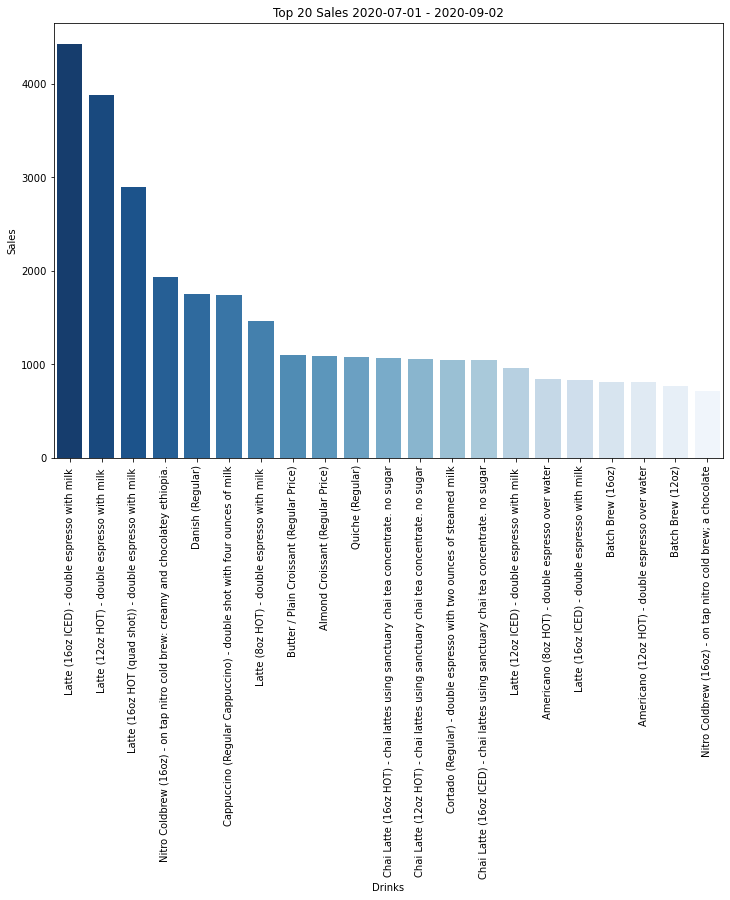

In [21]:
# visualization (top 20 sales)
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(4*3,8), )
plt.xticks(rotation=90)
col = "item_header_only"
df_tmp = pd.DataFrame(df_clean_unstack[col].value_counts()).reset_index()
fig = sns.barplot(x = "index", y = "item_header_only", data=df_tmp.loc[:20,:], 
                  palette="Blues_r",
                  ax = ax)\
    .set(title='Top 20 Sales 2020-07-01 - 2020-09-02', xlabel='Drinks', ylabel='Sales')

In [22]:
df_item = pd.DataFrame(df_clean_unstack.item_header_only.unique(), columns=["item"]).sort_values("item")
df_item.head(30)

,item
196,'Stay Cozy' 16oz Mug (Regular)
219,*WILD GOOSE GUEST BAKERY* (4.75)
218,*WILD GOOSE GUEST BAKERY* (5)
116,12 Month Coffee Subscription Gift - 12 oz
200,3 Month Coffee Subscription Gift - 12 oz
174,Aeropress (Regular)
26,Almond Croissant (Regular Price)
22,Americano (12oz HOT) - double espresso over water
48,Americano (12oz ICED) - double espresso over water
49,Americano (16oz HOT (quad shot)) - double espresso over water


In [24]:
# further extract info

In [25]:
# main name (before ())
df_item['name'] = df_item.item.apply(lambda x:  x.split("(")[0].strip())

# extract info
df_item["extra_info"] = df_item.item.apply(lambda x:  "".join(re.findall(r"\(.*\)", x)))
df_item["oz"] = df_item.item.apply(lambda x:  "".join(re.findall("[0-9]*[0-9]oz", x)))
df_item["temperature"] = df_item.item.apply(lambda x:  "".join(re.findall("HOT|ICED", x)))

df_item

,item,name,extra_info,oz,temperature
196,'Stay Cozy' 16oz Mug (Regular),'Stay Cozy' 16oz Mug,(Regular),16oz,
219,*WILD GOOSE GUEST BAKERY* (4.75),*WILD GOOSE GUEST BAKERY*,(4.75),,
218,*WILD GOOSE GUEST BAKERY* (5),*WILD GOOSE GUEST BAKERY*,(5),,
116,12 Month Coffee Subscription Gift - 12 oz,12 Month Coffee Subscription Gift - 12 oz,,,
200,3 Month Coffee Subscription Gift - 12 oz,3 Month Coffee Subscription Gift - 12 oz,,,
...,...,...,...,...,...
29,Turkey & Cheese Croissant (Regular),Turkey & Cheese Croissant,(Regular),,
112,White Tea Rose Melange (Regular),White Tea Rose Melange,(Regular),,
128,White- Rose Melange (12oz HOT),White- Rose Melange,(12oz HOT),12oz,HOT
145,White- Rose Melange (16oz HOT),White- Rose Melange,(16oz HOT),16oz,HOT


In [26]:
# now we have 81 main items
df_item.name.value_counts().count()

139

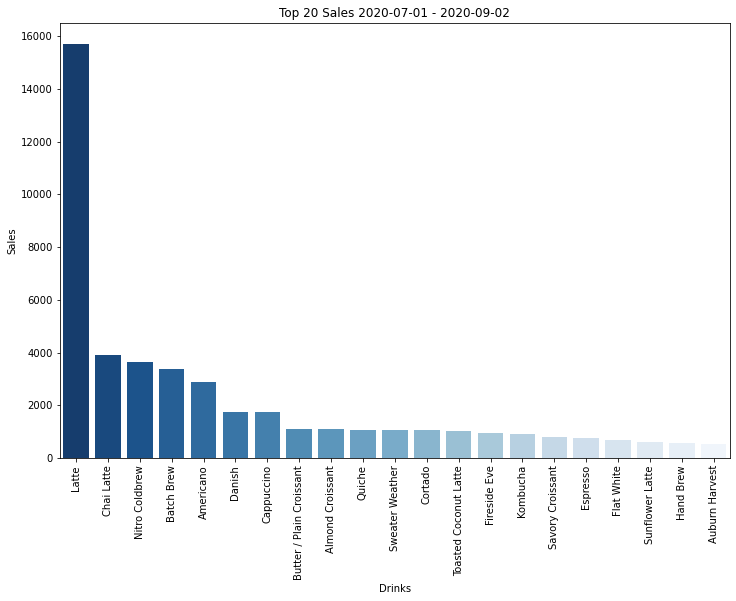

In [27]:
# one more stats for now
fig, ax = plt.subplots(figsize=(4*3,8), )
plt.xticks(rotation=90)
col = "name"
df_more_info = pd.merge(df_clean_unstack, df_item,
            left_on="item_header_only", right_on="item")
df_tmp = pd.DataFrame(df_more_info[col].value_counts()).reset_index()
fig = sns.barplot(x = "index", y = col, data=df_tmp.loc[:20,:], 
                  palette="Blues_r",
                  ax = ax)\
    .set(title='Top 20 Sales 2020-07-01 - 2020-09-02', xlabel='Drinks', ylabel='Sales')

# Summary
## There is some heavy lifting of text processing on the data from SquareAPI
* the original data pulled from SquareAPI uses "," as seperators. This causes a big issue because certain prodcuts has commas in the description, thus makes it very hard to seperate items. 
* SquareAPI uses 2 X item symbol to represent [item, item]
* I tried to find the pattern to match the non-essential part of the item names that seperated by commas and considered them as stop words and drop those non-essential descriptions.
* I used regular expression (regex) to match the 2 x expression to a list form.
* I unstack the item list within each transaction to make a long(er) table so that each row only include one item. In this way it would be easy to track ingredients consumption associated with the items.

## To do
* While the item name data looks cleaner now, we need to verify it with the actual item names in the shop.
* The processing approach might still include bugs (e.g., wrong item names) that is hard to identify at this point. If possible, by adding speical symbol to the item names would help to iendentify the boundries between items within the same transaction (e.g., get rid of the commas). This would significally improve process logic and make it less error prone.

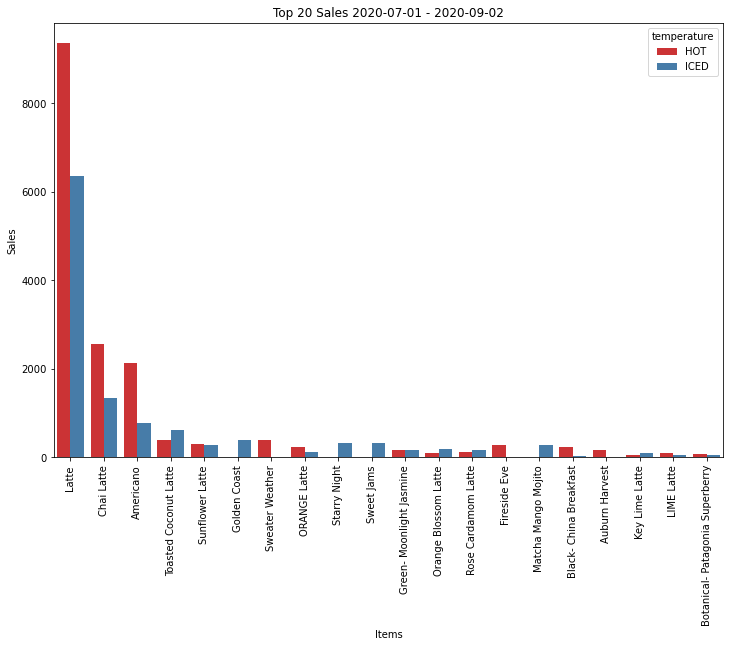

In [30]:
fig, ax = plt.subplots(figsize=(4*3,8), )
plt.xticks(rotation=90)
col = "name"
col_2 = "temperature"
list_choice = df_more_info[df_more_info[col_2]!=""][col].value_counts().index[:20]
fig = sns.countplot(x=col, hue=col_2, data=df_more_info[df_more_info[col].isin(list_choice)],
              order=list_choice, ax=ax, palette="Set1", hue_order=["HOT", "ICED", ]
             )\
.set(title='Top 20 Sales 2020-07-01 - 2020-09-02', xlabel='Items', ylabel='Sales')

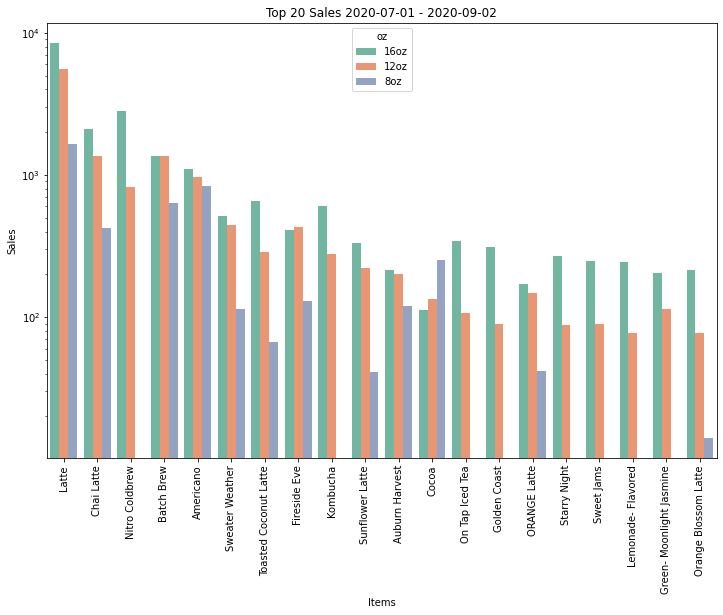

In [31]:
fig, ax = plt.subplots(figsize=(4*3,8), )
plt.xticks(rotation=90)
ax.set_yscale('log')

col = "name"
col_2 = "oz"
list_choice = df_more_info[df_more_info[col_2]!=""][col].value_counts().index[:20]
fig = sns.countplot(x=col, hue=col_2, data=df_more_info[df_more_info[col].isin(list_choice)],
              order=list_choice, ax=ax, palette="Set2", hue_order=["16oz", "12oz", "8oz"]
             )\
.set(title='Top 20 Sales 2020-07-01 - 2020-09-02', xlabel='Items', ylabel='Sales')\



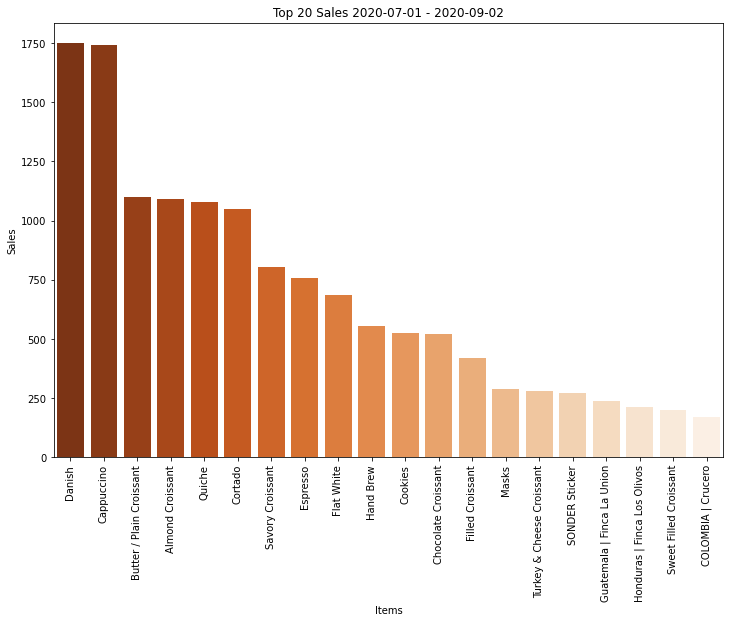

In [32]:
fig, ax = plt.subplots(figsize=(4*3,8), )
plt.xticks(rotation=90)
col = "name"
col_2 = "oz"
list_choice = df_more_info[df_more_info[col_2]==""][col].value_counts().index[:20]
fig = sns.countplot(x=col, data=df_more_info[df_more_info[col].isin(list_choice)],
              order=list_choice, ax=ax, palette="Oranges_r", 
             )\
.set(title='Top 20 Sales 2020-07-01 - 2020-09-02', xlabel='Items', ylabel='Sales')

In [33]:
df_clean_unstack.columns

Index(['Date', 'Time', 'Time Zone', 'Gross Sales', 'Source',
       'Card Entry Methods', 'Description', 'Location', 'Customer ID',
       'Customer Name', 'item_no_stopword', 'item_individual',
       'item_header_only'],
      dtype='object')

In [34]:
df_clean_unstack[["Date", 'Time', 'item_header_only']]

,Date,Time,item_header_only
0,05/11/21,16:36:42,Latte (12oz HOT) - double espresso with milk
1,05/11/21,16:26:19,Latte (8oz HOT) - double espresso with milk
2,05/11/21,16:15:10,Chai Latte (16oz ICED) - chai lattes using sanctuary chai tea concentrate. no sugar
3,05/11/21,16:13:45,Ritual Mexico (Regular)
4,05/11/21,16:13:45,ORANGE Latte (12oz HOT) - sweet
...,...,...,...
55936,05/11/20,08:19:01,Decaf | Colombia (Regular Price)
55937,05/11/20,08:13:10,Hand Brew (Honduras Natural | Finca Los Olivos) - pourover coffee on a v60
55938,05/11/20,08:07:10,Key Lime Latte (8oz HOT)
55939,05/11/20,08:07:10,Cappuccino (Regular Cappuccino) - double shot with four ounces of milk
